# Camera Modeling and Calibration

Objective: We are going to simulate using Python, the projection of a camera, by looking for its projection matrix. This matrix will be computed by a function that receives as inputs the extrinsic (rotation, translation) and intrinsic (K (3 × 3)) parameters, then by the "Hall" method.


In [1]:
#### Import of numpy, matplotlib, and opencv libraries.
import matplotlib.pyplot as plt 
import cv2
import numpy as np

# Part 1: Simulation of the projection of a camera

Creation of the function "make_projective" which returns the projection matrix of a camera, which receives as inputs the extrinsic (θx, θy, θz, tx, ty, tz) and intrinsic (K) parameters 

In [2]:
def make_projective(thetax, thetay, thetaz, Tx, Ty, Tz, K):

    Rx = np.array([[1, 0, 0, 0], 
                   [1, np.cos(thetax), -np.sin(thetax), 0], 
                   [0, np.sin(thetax), np.cos(thetax), 0], 
                   [0, 0, 0, 1]])
    
    Ry = np.array([[np.cos(thetay), 0, np.sin(thetay), 0], 
                   [0, 1, 0, 0], 
                   [-np.sin(thetay), 0, np.cos(thetay), 0], 
                   [0, 0, 0, 1]])
    
    Rz = np.array([[np.cos(thetaz), -np.sin(thetaz), 0, 0], 
                   [np.sin(thetaz), np.cos(thetaz), 0 , 0], 
                   [0, 0 , 1, 0], 
                   [0, 0, 0, 1]])
    
    R = Rx@Ry@Rz
    
    T = np.array([[1, 0 , 0, Tx],
                 [0, 1, 0, Ty],
                 [0, 0, 1, Tz],
                 [0, 0, 0, 1]])
    TR = T@R
    P = K@TR[0:3,0:4]
   
    return P

Creation of the "project" function which implements the image formation process.

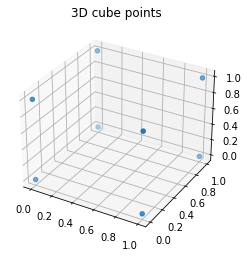

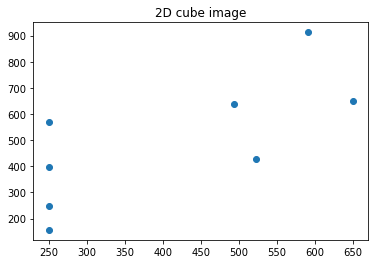

In [3]:
def project(P, X):
    #x = P@X[0:4, 0:8]
    x = P@X
    return x

####  First test of the function (Generation of the cube image)

# Intrinsic parameter K(3×3)
K = np.array([[800, 0, 250], [0, 800, 250], [0, 0, 1]])  
# Extrinsic parameters (θx, θy, θz, tx, ty, tz)
thetax = 20*(np.pi)/180   # (20° × π/180) = 0.3491rad (degree to radian)
thetay = 0
thetaz = 0
Tx = 0
Ty = 0
Tz = 2

# Coordinates of the 8 cube points
S1= np.transpose([0, 0, 0, 1])
S2= np.transpose([1, 0, 0, 1])
S3= np.transpose([0, 1, 0, 1])
S4= np.transpose([0, 0, 1, 1])
S5= np.transpose([1, 1, 0, 1])
S6= np.transpose([1, 0, 1, 1])
S7= np.transpose([0, 1, 1, 1])
S8= np.transpose([1, 1, 1, 1])
cube = np.array([S1, S2, S3, S4, S5, S6, S7, S8])
# Display of the cube points in 3D
plt.figure(1)
ax = plt.axes(projection='3d')
ax.scatter3D(cube[:,0],cube[:,1],cube[:,2])
plt.title('3D cube points')
plt.show()

#  Generation of the cube image in 2D
X = np.transpose(cube) 
P = make_projective(thetax, thetay, thetaz, Tx, Ty, Tz, K)
x = project(P, X)
x = x / x[2,:]  # devision by the third line to have the real values in coordinates of x and y.
#  Display of the image of the cube in 2D
plt.figure(2)
plt.scatter(x[0,:], x[1,:])
plt.title('2D cube image')
plt.show()

Generalization of the cube images for 4 different extrinsic parameters

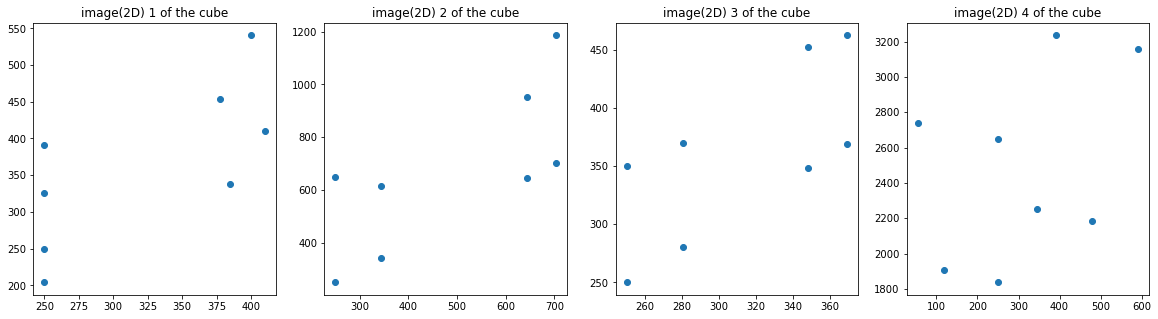

In [4]:
# P = make_projective(thetax, thetay, thetaz, Tx, Ty, Tz, K)
P1 = make_projective(20*(np.pi)/180, 0, 0, 0, 0, 5, K)
P2 = make_projective(0, 20*(np.pi)/180, 0, 0, 0, 2, K)
P3 = make_projective(0, 20*(np.pi)/180, 0, 0, 0, 8, K)
P4 = make_projective(3*(np.pi)/180, 0, 30*(np.pi)/180, 0, 6, 2, K)

x1 = project(P1, X)
x1 = x1 / x1[2,:]
x2 = project(P2, X)
x2 = x2 / x2[2,:]
x3 = project(P3, X)
x3 = x3 / x3[2,:]
x4 = project(P4, X)
x4 = x4 / x4[2,:]

## Display of the 4 images of the cube for 4 different extrinsic parameters
fig, axs = plt.subplots(1,4, figsize=(20, 5))
axs[0].set_title('image(2D) 1 of the cube')
axs[0].scatter(x1[0,:], x1[1,:])

axs[1].set_title('image(2D) 2 of the cube')
axs[1].scatter(x2[0,:], x2[1,:])

axs[2].set_title('image(2D) 3 of the cube')
axs[2].scatter(x3[0,:], x3[1,:])

axs[3].set_title('image(2D) 4 of the cube')
axs[3].scatter(x4[0,:], x4[1,:])
plt.show()

# Observation: According to the 4 images of the cube obtained, we notice that the images of the cube in 2D have different 
#              shapes. This is because of different camera positions (e.g. change of extrinsic parameters) to capture the 
#              object (cube in our case) in 3D.

# Part 2: Hall's method

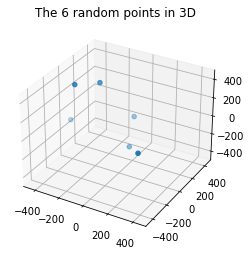

In [5]:
###   2.1 Intrinsic and extrinsic parameters
K = np.array([[557.0943, 0,  326.3819], [0, 712.9824, 298.6679], [0, 0, 1]])
thetax = 0.8*(np.pi)/2  
thetay = -1.8*(np.pi)/2
thetaz = (np.pi)/5
Tx = 100
Ty = 0
Tz = 1500


###   2.2 Six random points in the range [-480 : 480 ; -480 : 480 ; -480 : 480].
NbrePt = 6  # nombre des points 
PtsX = np.random.randint(-480, 480, NbrePt) # random coordinates along the x-axis
PtsY = np.random.randint(-480, 480, NbrePt) # random coordinates along the y-axis
PtsZ = np.random.randint(-480, 480, NbrePt) # random coordinates along the z axis
Points = np.zeros((NbrePt, 4))
for i in range(NbrePt):
    Points[i] = np.transpose([PtsX[i], PtsY[i], PtsZ[i], 1])

# Random point displays in the range [-480 : 480 ; -480 : 480 ; -480 : 480].
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(Points[:,0],Points[:,1],Points[:,2])
ax.set_xlim3d(-480, 480)
ax.set_ylim3d(-480, 480)
ax.set_zlim3d(-480, 480)
plt.title('The 6 random points in 3D')
plt.show()

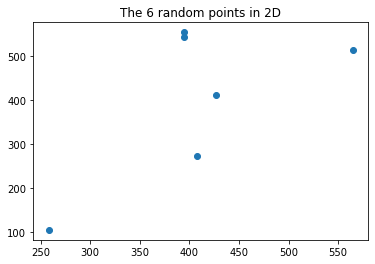

In [6]:
###   2.3 Calculation of the projection of these points on the image plane using the projection matrix and the implemented projection function
X = np.transpose(Points)
P = make_projective(thetax, thetay, thetaz, Tx, Ty, Tz, K)
x = project(P, X)
x = x/x[2,:]

###   2.4 Plotting the obtained 2D points.
plt.figure()
plt.scatter(x[0,:], x[1,:])
plt.title('The 6 random points in 2D')
plt.show()

In [10]:
###   2.5 Calculation of the projection matrix A using the Hall method. 

## calculation of the matrix Q (Q=X) and B (B=x) => projection matrix A
Q    = np.zeros((2*len(X[0,:]), 11))
B    = np.zeros((2*len(X[0,:]), 1))
for i in range(len(X[0,:])):   
    Q[2*i,:]   = np.array([X[0,i],X[1,i],X[2,i], 1, 0, 0, 0, 0, -x[0,i]*X[0,i], -x[0,i]*X[1,i], -x[0,i]*X[2,i]])
    Q[2*i+1,:] = np.array([0, 0, 0, 0, X[0,i],X[1,i],X[2,i], 1, -x[1,i]*X[0,i], -x[1,i]*X[1,i], -x[1,i]*X[2,i]])
    B[2*i,:]   = np.array([x[0,i]])
    B[2*i+1,:] = np.array([x[1,i]])
#  search for A by Hall's method =>
Qt = np.transpose(Q)
QtQ = (Qt)@Q
invQtQ = np.linalg.pinv(QtQ)
A = invQtQ@Qt@B
A = np.array([[A[0,0], A[1,0], A[2,0], A[3,0]], [A[4,0], A[5,0], A[6,0], A[7,0]], [A[8,0], A[9,0], A[10,0], 1]])
P = P/P[2,3] # P is the initial matrix to compare with A
print('initial matrix:',P)
print('the matrix obtained by the Hall method:',A)

initial matrix: [[-1.47315048e-01  3.62820604e-01 -1.78715227e-01  3.63521520e+02]
 [-2.65712256e-01  6.08678065e-01  2.24532445e-01  2.98667900e+02]
 [ 4.24180829e-04  4.75528258e-04 -1.95928417e-04  1.00000000e+00]]
the matrix obtained by the Hall method: [[-1.47315019e-01  3.62820612e-01 -1.78715238e-01  3.63521519e+02]
 [-2.65712235e-01  6.08678077e-01  2.24532427e-01  2.98667897e+02]
 [ 4.24180884e-04  4.75528264e-04 -1.95928456e-04  1.00000000e+00]]


Comparison: the matrix A obtained by the Hall method and the initial matrix are equal. 

In [12]:
###   2.6 Adding Gaussian noise (mean = 0, variance = 1) to 2D points
row,col= x.shape
mean  = 0
var   = 1
sigma = var**0.5
gauss = np.random.normal(mean,sigma,(row,col))
gauss = gauss.reshape(row,col)
x_noisy = x + gauss
x_noisy = x_noisy / x_noisy[2,:]

In [15]:
###   2.6 Recalculation of the projection matrix from 2.5 
Q    = np.zeros((2*len(X[0,:]), 11))
B    = np.zeros((2*len(X[0,:]), 1))
x = x_noisy
for i in range(len(X[0,:])):   
    Q[2*i,:]   = np.array([X[0,i],X[1,i],X[2,i], 1, 0, 0, 0, 0, -x[0,i]*X[0,i], -x[0,i]*X[1,i], -x[0,i]*X[2,i]])
    Q[2*i+1,:] = np.array([0, 0, 0, 0, X[0,i],X[1,i],X[2,i], 1, -x[1,i]*X[0,i], -x[1,i]*X[1,i], -x[1,i]*X[2,i]])
    B[2*i,:]   = np.array([x[0,i]])
    B[2*i+1,:] = np.array([x[1,i]])
    
Qt = np.transpose(Q)
QtQ = (Qt)@Q
invQtQ = np.linalg.pinv(QtQ)
A = invQtQ@Qt@B  # the projection matrix A
print('the projection matrix A obtained after adding the Gaussian noise:',A)

the projection matrix A obtained after adding the Gaussian noise: [[-4.98374805e+00]
 [-1.77750674e+00]
 [-2.97597562e+00]
 [ 2.78540855e+02]
 [-4.49813527e+00]
 [-2.37839503e+00]
 [-2.48590326e+00]
 [ 3.53902057e+02]
 [-4.92051885e-03]
 [-4.58115573e-03]
 [-3.97972239e-03]]


Comparison: the projection matrix A obtained after adding the Gaussian noise is different from that of 2.5.

In [ ]:
## Now the calculation of the 2D points from our new projection matrix A
A = np.array([[A[0,0], A[1,0], A[2,0], A[3,0]], [A[4,0], A[5,0], A[6,0], A[7,0]], [A[8,0], A[9,0], A[10,0], 1]])
x = A@X
x = x/x[2,:]

Comparison: With our new projection matrix A, we did not get the same coordinates of the 2D points. This is because of the noise we added, which prevented us from having the same transformation for all the points. We can say that with the addition of noise, the object (6 points in our case) has an irreversible transformation that prevents it from going backwards (3D object) by the new matrix A.

In [16]:
###   2.7 Increasing the number of 3D points to 8, then 50
# For 8 points :
NbrePt = 8
PtsX = np.random.randint(-480, 480, NbrePt)
PtsY = np.random.randint(-480, 480, NbrePt)
PtsZ = np.random.randint(-480, 480, NbrePt)

Points = np.zeros((NbrePt, 4))

for i in range(NbrePt):
    Points[i] = np.transpose([PtsX[i], PtsY[i], PtsZ[i], 1])

#calculation of the projection matrix A for 8 points
Q    = np.zeros((2*len(X[0,:]), 11))
B    = np.zeros((2*len(X[0,:]), 1))
for i in range(len(X[0,:])):   
    Q[2*i,:]   = np.array([X[0,i],X[1,i],X[2,i], 1, 0, 0, 0, 0, -x[0,i]*X[0,i], -x[0,i]*X[1,i], -x[0,i]*X[2,i]])
    Q[2*i+1,:] = np.array([0, 0, 0, 0, X[0,i],X[1,i],X[2,i], 1, -x[1,i]*X[0,i], -x[1,i]*X[1,i], -x[1,i]*X[2,i]])
    B[2*i,:]   = np.array([x[0,i]])
    B[2*i+1,:] = np.array([x[1,i]])
    
Qt = np.transpose(Q)
QtQ = (Qt)@Q
invQtQ = np.linalg.pinv(QtQ)
A = invQtQ@Qt@B
print('for 8 points, A is :', A)

for 8 points, A is : [[-4.98374805e+00]
 [-1.77750674e+00]
 [-2.97597562e+00]
 [ 2.78540855e+02]
 [-4.49813527e+00]
 [-2.37839503e+00]
 [-2.48590326e+00]
 [ 3.53902057e+02]
 [-4.92051885e-03]
 [-4.58115573e-03]
 [-3.97972239e-03]]


In [17]:
# For 50 points :
NbrePt = 50
PtsX = np.random.randint(-480, 480, NbrePt)
PtsY = np.random.randint(-480, 480, NbrePt)
PtsZ = np.random.randint(-480, 480, NbrePt)

Points = np.zeros((NbrePt, 4))

for i in range(NbrePt):
    Points[i] = np.transpose([PtsX[i], PtsY[i], PtsZ[i], 1])

#calculation of the projection matrix A for 50 points
Q    = np.zeros((2*len(X[0,:]), 11))
B    = np.zeros((2*len(X[0,:]), 1))
for i in range(len(X[0,:])):   
    Q[2*i,:]   = np.array([X[0,i],X[1,i],X[2,i], 1, 0, 0, 0, 0, -x[0,i]*X[0,i], -x[0,i]*X[1,i], -x[0,i]*X[2,i]])
    Q[2*i+1,:] = np.array([0, 0, 0, 0, X[0,i],X[1,i],X[2,i], 1, -x[1,i]*X[0,i], -x[1,i]*X[1,i], -x[1,i]*X[2,i]])
    B[2*i,:]   = np.array([x[0,i]])
    B[2*i+1,:] = np.array([x[1,i]])
    
Qt = np.transpose(Q)
QtQ = (Qt)@Q
invQtQ = np.linalg.pinv(QtQ)
A = invQtQ@Qt@B
print('For 50 points, A is :', A)


For 50 points, A is : [[-4.98374805e+00]
 [-1.77750674e+00]
 [-2.97597562e+00]
 [ 2.78540855e+02]
 [-4.49813527e+00]
 [-2.37839503e+00]
 [-2.48590326e+00]
 [ 3.53902057e+02]
 [-4.92051885e-03]
 [-4.58115573e-03]
 [-3.97972239e-03]]


Comparison: the matrix A obtained for 8 points and the one obtained for 50 points are equal. The projection matrix does not depend on the number of points, it remains unchangeable as all the points of the object (the points in our case) have the same transfomation from 3D to 2D. 